In [2]:
#import packages
from __future__ import division 
import sys
import pandas as pd
import numpy as np
import scipy
from numpy import mean, std, cov 
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
import scipy.stats as stats 
from scipy.stats import t, pearsonr, sem
import seaborn as sns
from statistics import mean, stdev

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(color_codes=True)
sns.set_theme(style='white')

In [4]:
# import sys
# print(sys.executable)
# !{sys.executable} -m pip install bambi

In [5]:
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

ModuleNotFoundError: No module named 'arviz'

In [9]:
#import excel file containing data summary

data = pd.read_csv(r'APS_results/WTP_Study2_LONG_REG.csv', encoding='utf-8-sig')
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(data.head())
print(data.columns)

                      subid  balanced  subtrial  social_money  \
0  56259489ed6e5a0005c80fde         1         1          0.05   
1  56259489ed6e5a0005c80fde         1         2          0.03   
2  56259489ed6e5a0005c80fde         1         3          0.01   
3  56259489ed6e5a0005c80fde         1         4          0.01   
4  56259489ed6e5a0005c80fde         1         5          0.03   

   nonsocial_money  exp_chosen  decision_price  reaction_time  response  AQ  \
0             0.02         0.0            0.02         2.0925       2.0  37   
1             0.04         0.0            0.04         1.8986       1.0  37   
2             0.03         0.0            0.03         2.2145       2.0  37   
3             0.05         1.0            0.01         1.4479       2.0  37   
4             0.02         0.0            0.02         1.3662       2.0  37   

   MSSSF     MSPSS  IRI_FS  IRI_EC  IRI_PD  IRI_PT  BRCS  LSAS  LSAS_FEAR  \
0     51  6.666667      26      20      14      15    18 

In [ ]:
# #import excel file  containing data summary
# study2 = wtpdata.loc[(wtpdata['balanced'] == 1)]
# study2= study2.reset_index(drop=True)
# print(study2)


In [ ]:
# sum_wtp =study2.total_spent_social
# aq = study2.AQ

In [ ]:
# model_hierarchical = bmb.Model("p(sum_wtp,AQ ) ~ 1 + (1|dem_ID)", df, family="binomial")
# model_hierarchical

In [10]:
 ## getting column names
demographics = "dem_AGE + dem_GENDER +dem_SEX +dem_ETHNICITY"
prices = "social_money + nonsocial_money"
sociability = "MSPSS + UM_AFFILIATION + UM_INTIMACY"
mentalizing = "AQ + IRI_PT + IRI_EC"
solitude = "MSSSF + UCLA_loneliness"
dep_anx = "RSE + CESD + LSAS + STAI"
coping = 'BRCS'
reward = 'BISBAS_BIS + BISBAS_BASRR + BISBAS_FS + BISBAS_BASD'
covid = 'COVIDexperience_score + COVIDimpacts_score + COVIDthreat_score + COVIDpsychstress_score'
y = data["exp_chosen"]

x_columns = demographics

In [11]:
## creating function to get model statistics
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
# def get_stats():
#     x = data[x_columns]
#     results = smf.Logit(y, x).fit()
#     print(results.summary())
# get_stats()
# x_columns.extend(sociability)
# get_stats()



In [12]:
#add demographics to model
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY', family= sm.families.Binomial(),data=data).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11244
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7754.7
Date:                Wed, 25 May 2022   Deviance:                       15509.
Time:                        17:48:48   Pearson chi2:                 1.12e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7359      0.162      4.553      0.000       0.419       1.053
dem_AGE          -0.0341      0.004     -8.197      0.000      -0.042      -0.026
dem_GENDER       -0.2374      0.078     -3.063      0.002      -0.389      -0.085
dem_SEX           0.2351      0.088      2.670      0.008       0.063       0.408
dem_ETHNICITY     0.0986      0.055      1.809      0.070      -0.008       0.205
=================================================================================
"""

In [39]:
#add prices to model
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + social_money + nonsocial_money', family= sm.families.Binomial(),data=data).fit()
model.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11242
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7703.0
Date:                Wed, 25 May 2022   Deviance:                       15406.
Time:                        18:03:25   Pearson chi2:                 1.12e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6938      0.172      4.034      0.000       0.357       1.031
dem_AGE            -0.0344      0.004     -8.244      0.000      -0.043      -0.026
dem_GENDER         -0.2397      0.078     -3.078      0.002      -0.392      -0.087
dem_SEX             0.2371      0.088      2.680      0.007       0.064       0.410
dem_ETHNICITY       0.0998      0.055      1.822      0.068      -0.008       0.207
social_money       -8.8042      1.346     -6.540      0.000     -11.443      -6.166
nonsocial_money    10.4759      1.347      7.775      0.000       7.835      13.117
===================================================================================
"""

In [41]:
null_ll=model.llf
print(null_ll)

-7702.966380136987


In [15]:
#add social measures
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + social_money + nonsocial_money + %s' %(dep_anx), family= sm.families.Binomial(),data=data).fit()
model.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11238
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7625.4
Date:                Wed, 25 May 2022   Deviance:                       15251.
Time:                        17:48:59   Pearson chi2:                 1.13e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.2312      0.255      4.837      0.000       0.732       1.730
dem_AGE            -0.0445      0.004    -10.246      0.000      -0.053      -0.036
dem_GENDER         -0.2129      0.081     -2.639      0.008      -0.371      -0.055
dem_SEX             0.2587      0.091      2.829      0.005       0.079       0.438
dem_ETHNICITY      -0.0059      0.057     -0.104      0.917      -0.117       0.105
social_money       -8.9367      1.356     -6.592      0.000     -11.594      -6.280
nonsocial_money    10.6168      1.357      7.824      0.000       7.957      13.276
RSE                 0.0090      0.005      1.892      0.058      -0.000       0.018
CESD               -0.0113      0.003     -3.828      0.000      -0.017      -0.006
LSAS               -0.0021      0.001     -2.853      0.004      -0.003      -0.001
STAI               -0.0026      0.002     -1.054      0.292      -0.007       0.002
===================================================================================
"""

In [16]:
#add social measures
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + social_money + nonsocial_money + %s +%s' %(dep_anx,solitude), family= sm.families.Binomial(),data=data).fit()
model.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11236
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7578.4
Date:                Wed, 25 May 2022   Deviance:                       15157.
Time:                        17:49:02   Pearson chi2:                 1.13e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.4443      0.292      8.382      0.000       1.873       3.016
dem_AGE            -0.0433      0.004     -9.921      0.000      -0.052      -0.035
dem_GENDER         -0.1843      0.081     -2.270      0.023      -0.343      -0.025
dem_SEX             0.2078      0.093      2.242      0.025       0.026       0.390
dem_ETHNICITY       0.0474      0.058      0.815      0.415      -0.067       0.161
social_money       -8.9936      1.361     -6.606      0.000     -11.662      -6.325
nonsocial_money    10.7175      1.363      7.865      0.000       8.047      13.388
RSE                 0.0021      0.005      0.416      0.678      -0.008       0.012
CESD               -0.0005      0.003     -0.170      0.865      -0.007       0.006
LSAS               -0.0015      0.001     -1.986      0.047      -0.003   -1.96e-05
STAI               -0.0027      0.002     -1.088      0.277      -0.007       0.002
MSSSF              -0.0167      0.003     -5.929      0.000      -0.022      -0.011
UCLA_loneliness    -0.0153      0.003     -6.039      0.000      -0.020      -0.010
===================================================================================
"""

In [31]:
#add social measures
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + social_money + nonsocial_money + %s + %s +%s' %(dep_anx,solitude,mentalizing), family= sm.families.Binomial(),data=data).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11233
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7543.2
Date:                Wed, 25 May 2022   Deviance:                       15086.
Time:                        18:00:18   Pearson chi2:                 1.12e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.5454      0.312      8.168      0.000       1.935       3.156
dem_AGE            -0.0432      0.004     -9.825      0.000      -0.052      -0.035
dem_GENDER         -0.2309      0.082     -2.819      0.005      -0.391      -0.070
dem_SEX             0.2231      0.094      2.375      0.018       0.039       0.407
dem_ETHNICITY       0.0552      0.059      0.942      0.346      -0.060       0.170
social_money       -9.0455      1.366     -6.623      0.000     -11.722      -6.369
nonsocial_money    10.7719      1.367      7.880      0.000       8.092      13.451
RSE                 0.0009      0.005      0.179      0.858      -0.009       0.011
CESD                0.0005      0.003      0.143      0.887      -0.006       0.007
LSAS               -0.0007      0.001     -0.888      0.375      -0.002       0.001
STAI               -0.0022      0.002     -0.866      0.387      -0.007       0.003
MSSSF              -0.0158      0.003     -5.430      0.000      -0.021      -0.010
UCLA_loneliness    -0.0094      0.003     -3.527      0.000      -0.015      -0.004
AQ                 -0.0266      0.004     -7.542      0.000      -0.034      -0.020
IRI_PT             -0.0062      0.005     -1.264      0.206      -0.016       0.003
IRI_EC              0.0131      0.005      2.593      0.010       0.003       0.023
===================================================================================
"""

In [34]:
reduced_ll=model.llf
print(reduced_ll)

-7543.160298815591


In [44]:
#add social measures
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + social_money + nonsocial_money + %s + %s +%s +%s' %(dep_anx,solitude,mentalizing,sociability), family= sm.families.Binomial(),data=data).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11230
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7480.1
Date:                Wed, 25 May 2022   Deviance:                       14960.
Time:                        18:05:29   Pearson chi2:                 1.12e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3762      0.390      0.963      0.335      -0.389       1.142
dem_AGE            -0.0349      0.005     -7.744      0.000      -0.044      -0.026
dem_GENDER         -0.2022      0.082     -2.462      0.014      -0.363      -0.041
dem_SEX             0.2044      0.095      2.142      0.032       0.017       0.391
dem_ETHNICITY      -0.0297      0.060     -0.499      0.618      -0.147       0.087
social_money       -9.1519      1.374     -6.663      0.000     -11.844      -6.460
nonsocial_money    10.8956      1.375      7.924      0.000       8.201      13.591
RSE                -0.0008      0.005     -0.150      0.881      -0.011       0.009
CESD               -0.0049      0.003     -1.481      0.139      -0.011       0.002
LSAS               -0.0014      0.001     -1.759      0.079      -0.003       0.000
STAI                0.0003      0.003      0.113      0.910      -0.005       0.005
MSSSF              -0.0165      0.003     -5.540      0.000      -0.022      -0.011
UCLA_loneliness     0.0040      0.003      1.157      0.247      -0.003       0.011
AQ                 -0.0183      0.004     -4.948      0.000      -0.026      -0.011
IRI_PT             -0.0068      0.005     -1.380      0.168      -0.017       0.003
IRI_EC             -0.0045      0.005     -0.831      0.406      -0.015       0.006
MSPSS               0.0341      0.024      1.424      0.154      -0.013       0.081
UM_AFFILIATION      0.0286      0.004      7.388      0.000       0.021       0.036
UM_INTIMACY         0.0210      0.004      5.207      0.000       0.013       0.029
===================================================================================
"""

In [45]:
full_ll=model.llf
print(full_ll)

-7480.116588013063


In [47]:
LR_statistic = -2*(reduced_ll-full_ll)

p_val = scipy.stats.chi2.sf(LR_statistic, 3)

print(LR_statistic,p_val)

LR_statistic_null = -2*(null_ll-full_ll)

p_val_null = scipy.stats.chi2.sf(LR_statistic_null, 3)

print(LR_statistic_null,p_val_null)


126.08742160505608 3.768291973346641e-27
445.6995842478482 2.786103948247791e-96


In [106]:
#add demographics to model
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY', family= sm.families.Binomial(),data=data).fit()
model.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11244
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7754.7
Date:                Wed, 25 May 2022   Deviance:                       15509.
Time:                        13:28:51   Pearson chi2:                 1.12e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7359      0.162      4.553      0.000       0.419       1.053
dem_AGE          -0.0341      0.004     -8.197      0.000      -0.042      -0.026
dem_GENDER       -0.2374      0.078     -3.063      0.002      -0.389      -0.085
dem_SEX           0.2351      0.088      2.670      0.008       0.063       0.408
dem_ETHNICITY     0.0986      0.055      1.809      0.070      -0.008       0.205
=================================================================================
"""

In [107]:
#add prices to model
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + social_money + nonsocial_money', family= sm.families.Binomial(),data=data).fit()
model.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11242
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7703.0
Date:                Wed, 25 May 2022   Deviance:                       15406.
Time:                        13:28:52   Pearson chi2:                 1.12e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6938      0.172      4.034      0.000       0.357       1.031
dem_AGE            -0.0344      0.004     -8.244      0.000      -0.043      -0.026
dem_GENDER         -0.2397      0.078     -3.078      0.002      -0.392      -0.087
dem_SEX             0.2371      0.088      2.680      0.007       0.064       0.410
dem_ETHNICITY       0.0998      0.055      1.822      0.068      -0.008       0.207
social_money       -8.8042      1.346     -6.540      0.000     -11.443      -6.166
nonsocial_money    10.4759      1.347      7.775      0.000       7.835      13.117
===================================================================================
"""

In [108]:
# model = smf.logit("exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY", data = data).fit()

# model.summary()

In [109]:
# model.params

In [110]:
#add social measures
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + social_money + nonsocial_money + %s' %(sociability), family= sm.families.Binomial(),data=data).fit()
model.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11239
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7536.2
Date:                Wed, 25 May 2022   Deviance:                       15072.
Time:                        13:28:54   Pearson chi2:                 1.12e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.8557      0.201     -4.264      0.000      -1.249      -0.462
dem_AGE            -0.0316      0.004     -7.398      0.000      -0.040      -0.023
dem_GENDER         -0.1629      0.079     -2.072      0.038      -0.317      -0.009
dem_SEX             0.1254      0.091      1.374      0.169      -0.053       0.304
dem_ETHNICITY      -0.0921      0.057     -1.617      0.106      -0.204       0.020
social_money       -9.0656      1.367     -6.634      0.000     -11.744      -6.387
nonsocial_money    10.7942      1.368      7.891      0.000       8.113      13.475
MSPSS               0.0699      0.017      4.110      0.000       0.037       0.103
UM_AFFILIATION      0.0396      0.004     11.272      0.000       0.033       0.047
UM_INTIMACY         0.0112      0.004      3.164      0.002       0.004       0.018
===================================================================================
"""

In [111]:
#add mentalizing measures
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + social_money + nonsocial_money + %s + %s' %(sociability, mentalizing), family= sm.families.Binomial(),data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11236
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7505.3
Date:                Wed, 25 May 2022   Deviance:                       15011.
Time:                        13:28:54   Pearson chi2:                 1.12e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1394      0.243      0.574      0.566      -0.337       0.616
dem_AGE            -0.0330      0.004     -7.616      0.000      -0.041      -0.024
dem_GENDER         -0.1963      0.079     -2.475      0.013      -0.352      -0.041
dem_SEX             0.1848      0.092      1.998      0.046       0.004       0.366
dem_ETHNICITY      -0.0733      0.057     -1.278      0.201      -0.186       0.039
social_money       -9.1131      1.370     -6.650      0.000     -11.799      -6.427
nonsocial_money    10.8379      1.372      7.900      0.000       8.149      13.527
MSPSS               0.0436      0.018      2.486      0.013       0.009       0.078
UM_AFFILIATION      0.0302      0.004      7.977      0.000       0.023       0.038
UM_INTIMACY         0.0179      0.004      4.580      0.000       0.010       0.026
AQ                 -0.0259      0.003     -7.545      0.000      -0.033      -0.019
IRI_PT             -0.0080      0.005     -1.690      0.091      -0.017       0.001
IRI_EC             -0.0093      0.005     -1.758      0.079      -0.020       0.001
===================================================================================
"""

In [112]:
#add solitude measures
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + social_money + nonsocial_money + %s + %s + %s' %(sociability, mentalizing, solitude), family= sm.families.Binomial(),data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11234
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7484.4
Date:                Wed, 25 May 2022   Deviance:                       14969.
Time:                        13:28:54   Pearson chi2:                 1.12e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4818      0.334      1.444      0.149      -0.172       1.136
dem_AGE            -0.0334      0.004     -7.596      0.000      -0.042      -0.025
dem_GENDER         -0.1925      0.080     -2.408      0.016      -0.349      -0.036
dem_SEX             0.1892      0.093      2.035      0.042       0.007       0.371
dem_ETHNICITY      -0.0120      0.058     -0.205      0.837      -0.127       0.103
social_money       -9.1397      1.373     -6.656      0.000     -11.831      -6.448
nonsocial_money    10.8903      1.374      7.923      0.000       8.196      13.584
MSPSS               0.0377      0.024      1.588      0.112      -0.009       0.084
UM_AFFILIATION      0.0283      0.004      7.380      0.000       0.021       0.036
UM_INTIMACY         0.0187      0.004      4.765      0.000       0.011       0.026
AQ                 -0.0205      0.004     -5.695      0.000      -0.028      -0.013
IRI_PT             -0.0072      0.005     -1.515      0.130      -0.017       0.002
IRI_EC             -0.0041      0.005     -0.759      0.448      -0.015       0.006
MSSSF              -0.0179      0.003     -6.139      0.000      -0.024      -0.012
UCLA_loneliness     0.0008      0.003      0.257      0.797      -0.005       0.007
===================================================================================
"""

In [113]:
#add depression/anxiety measures
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + social_money + nonsocial_money + %s + %s + %s +%s' %(sociability, mentalizing, solitude, dep_anx), family= sm.families.Binomial(),data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11230
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7480.1
Date:                Wed, 25 May 2022   Deviance:                       14960.
Time:                        13:28:55   Pearson chi2:                 1.12e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3762      0.390      0.963      0.335      -0.389       1.142
dem_AGE            -0.0349      0.005     -7.744      0.000      -0.044      -0.026
dem_GENDER         -0.2022      0.082     -2.462      0.014      -0.363      -0.041
dem_SEX             0.2044      0.095      2.142      0.032       0.017       0.391
dem_ETHNICITY      -0.0297      0.060     -0.499      0.618      -0.147       0.087
social_money       -9.1519      1.374     -6.663      0.000     -11.844      -6.460
nonsocial_money    10.8956      1.375      7.924      0.000       8.201      13.591
MSPSS               0.0341      0.024      1.424      0.154      -0.013       0.081
UM_AFFILIATION      0.0286      0.004      7.388      0.000       0.021       0.036
UM_INTIMACY         0.0210      0.004      5.207      0.000       0.013       0.029
AQ                 -0.0183      0.004     -4.948      0.000      -0.026      -0.011
IRI_PT             -0.0068      0.005     -1.380      0.168      -0.017       0.003
IRI_EC             -0.0045      0.005     -0.831      0.406      -0.015       0.006
MSSSF              -0.0165      0.003     -5.540      0.000      -0.022      -0.011
UCLA_loneliness     0.0040      0.003      1.157      0.247      -0.003       0.011
RSE                -0.0008      0.005     -0.150      0.881      -0.011       0.009
CESD               -0.0049      0.003     -1.481      0.139      -0.011       0.002
LSAS               -0.0014      0.001     -1.759      0.079      -0.003       0.000
STAI                0.0003      0.003      0.113      0.910      -0.005       0.005
===================================================================================
"""

In [114]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
# model_odds['p-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

,OR,2.5%,97.5%
Intercept,1.456731,0.677629,3.131606
dem_AGE,0.965731,0.957247,0.974292
dem_GENDER,0.816933,0.695494,0.959576
dem_SEX,1.226812,1.017546,1.479115
dem_ETHNICITY,0.970688,0.863687,1.090946
social_money,0.000106,0.000007,0.001565
nonsocial_money,53940.890760,3643.711147,798531.930435
MSPSS,1.034714,0.987249,1.084462
UM_AFFILIATION,1.028969,1.021203,1.036794
UM_INTIMACY,1.021206,1.013172,1.029304


In [115]:
#add coping
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + %s + %s + %s +%s +%s' %(sociability, mentalizing, solitude, dep_anx,coping), family= sm.families.Binomial(),data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11231
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7533.4
Date:                Wed, 25 May 2022   Deviance:                       15067.
Time:                        13:28:55   Pearson chi2:                 1.12e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3465      0.394      0.880      0.379      -0.426       1.119
dem_AGE            -0.0346      0.004     -7.716      0.000      -0.043      -0.026
dem_GENDER         -0.1979      0.082     -2.421      0.015      -0.358      -0.038
dem_SEX             0.2028      0.095      2.135      0.033       0.017       0.389
dem_ETHNICITY      -0.0299      0.059     -0.503      0.615      -0.146       0.086
MSPSS               0.0338      0.024      1.416      0.157      -0.013       0.080
UM_AFFILIATION      0.0277      0.004      7.081      0.000       0.020       0.035
UM_INTIMACY         0.0208      0.004      5.179      0.000       0.013       0.029
AQ                 -0.0180      0.004     -4.906      0.000      -0.025      -0.011
IRI_PT             -0.0074      0.005     -1.493      0.135      -0.017       0.002
IRI_EC             -0.0049      0.005     -0.893      0.372      -0.016       0.006
MSSSF              -0.0167      0.003     -5.580      0.000      -0.023      -0.011
UCLA_loneliness     0.0038      0.003      1.096      0.273      -0.003       0.011
RSE                -0.0016      0.005     -0.311      0.756      -0.012       0.008
CESD               -0.0048      0.003     -1.455      0.146      -0.011       0.002
LSAS               -0.0013      0.001     -1.691      0.091      -0.003       0.000
STAI                0.0006      0.003      0.237      0.812      -0.004       0.006
BRCS                0.0091      0.010      0.901      0.368      -0.011       0.029
===================================================================================
"""

In [116]:
# add reward sensitivity
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + %s + %s + %s +%s +%s +%s' %(sociability, mentalizing, solitude, dep_anx,coping,reward), family= sm.families.Binomial(),data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11227
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7529.0
Date:                Wed, 25 May 2022   Deviance:                       15058.
Time:                        13:28:55   Pearson chi2:                 1.12e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4069      0.401      1.014      0.311      -0.380       1.194
dem_AGE            -0.0353      0.005     -7.456      0.000      -0.045      -0.026
dem_GENDER         -0.1965      0.082     -2.407      0.016      -0.356      -0.036
dem_SEX             0.1996      0.096      2.086      0.037       0.012       0.387
dem_ETHNICITY      -0.0381      0.061     -0.630      0.529      -0.157       0.081
MSPSS               0.0347      0.024      1.442      0.149      -0.012       0.082
UM_AFFILIATION      0.0262      0.004      6.534      0.000       0.018       0.034
UM_INTIMACY         0.0213      0.004      5.243      0.000       0.013       0.029
AQ                 -0.0183      0.004     -4.821      0.000      -0.026      -0.011
IRI_PT             -0.0071      0.005     -1.408      0.159      -0.017       0.003
IRI_EC             -0.0037      0.006     -0.661      0.509      -0.015       0.007
MSSSF              -0.0161      0.003     -5.351      0.000      -0.022      -0.010
UCLA_loneliness     0.0032      0.003      0.914      0.361      -0.004       0.010
RSE                -0.0021      0.005     -0.407      0.684      -0.012       0.008
CESD               -0.0055      0.003     -1.652      0.098      -0.012       0.001
LSAS               -0.0015      0.001     -1.904      0.057      -0.003    4.38e-05
STAI                0.0011      0.003      0.430      0.667      -0.004       0.006
BRCS                0.0064      0.010      0.619      0.536      -0.014       0.027
BISBAS_BIS          0.0045      0.006      0.776      0.438      -0.007       0.016
BISBAS_BASRR       -0.0241      0.010     -2.319      0.020      -0.045      -0.004
BISBAS_FS           0.0129      0.009      1.486      0.137      -0.004       0.030
BISBAS_BASD         0.0208      0.010      2.159      0.031       0.002       0.040
===================================================================================
"""

In [117]:
#add covid measures
model = smf.glm('exp_chosen ~ dem_AGE + dem_GENDER+ dem_SEX+ dem_ETHNICITY + %s + %s + %s +%s +%s +%s +%s' %(sociability, mentalizing, solitude, dep_anx,coping, reward, covid), family= sm.families.Binomial(),data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             exp_chosen   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11223
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7519.8
Date:                Wed, 25 May 2022   Deviance:                       15040.
Time:                        13:28:55   Pearson chi2:                 1.12e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.1673      0.425     -0.393      0.694      -1.001       0.667
dem_AGE                   -0.0323      0.005     -6.653      0.000      -0.042      -0.023
dem_GENDER                -0.1580      0.083     -1.904      0.057      -0.321       0.005
dem_SEX                    0.1520      0.097      1.561      0.119      -0.039       0.343
dem_ETHNICITY             -0.0591      0.061     -0.973      0.331      -0.178       0.060
MSPSS                      0.0272      0.024      1.111      0.267      -0.021       0.075
UM_AFFILIATION             0.0241      0.004      5.782      0.000       0.016       0.032
UM_INTIMACY                0.0220      0.004      5.382      0.000       0.014       0.030
AQ                        -0.0161      0.004     -4.182      0.000      -0.024      -0.009
IRI_PT                    -0.0074      0.005     -1.448      0.148      -0.017       0.003
IRI_EC                    -0.0015      0.006     -0.268      0.789      -0.013       0.010
MSSSF                     -0.0149      0.003     -4.922      0.000      -0.021      -0.009
UCLA_loneliness            0.0030      0.003      0.860      0.390      -0.004       0.010
RSE                       -0.0023      0.005     -0.443      0.658      -0.012       0.008
CESD                      -0.0058      0.003     -1.717      0.086      -0.013       0.001
LSAS                      -0.0019      0.001     -2.389      0.017      -0.003      -0.000
STAI                       0.0010      0.003      0.388      0.698      -0.004       0.006
BRCS                       0.0060      0.010      0.576      0.564      -0.015       0.027
BISBAS_BIS                -0.0002      0.006     -0.029      0.977      -0.012       0.012
BISBAS_BASRR              -0.0190      0.011     -1.784      0.074      -0.040       0.002
BISBAS_FS                  0.0156      0.009      1.755      0.079      -0.002       0.033
BISBAS_BASD                0.0186      0.010      1.887      0.059      -0.001       0.038
COVIDexperience_score      0.0341      0.009      3.854      0.000       0.017       0.051
COVIDimpacts_score        -0.0016      0.002     -1.010      0.313      -0.005       0.002
COVIDthreat_score          0.0036      0.005      0.786      0.432      -0.005       0.012
COVIDpsychstress_score     0.0021      0.006      0.354      0.724      -0.009       0.014
==========================================================================================
"""

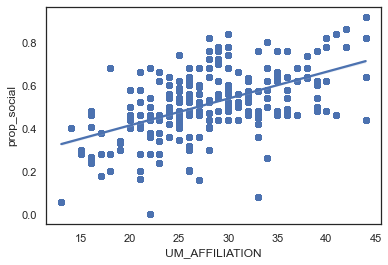

In [118]:
ax = sns.regplot(x="UM_AFFILIATION", y="prop_social", data=data)

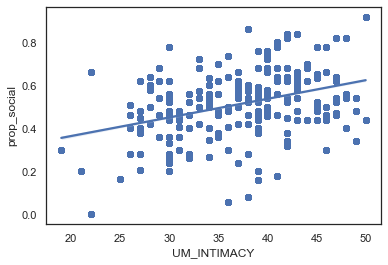

In [119]:
ax = sns.regplot(x="UM_INTIMACY", y="prop_social", data=data)

[Text(0.5, 0, 'Unified Motives Scale (UMS): Affiliation Subscale'),
 Text(0, 0.5, 'Social Experience Chosen')]

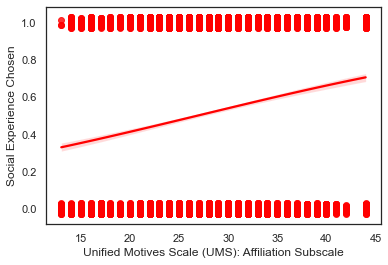

In [120]:
aff_exp = sns.regplot(x="UM_AFFILIATION", y="exp_chosen", data=data,logistic = True,y_jitter=0.03,color="red")
aff_exp.set(xlabel='Unified Motives Scale (UMS): Affiliation Subscale', ylabel='Social Experience Chosen')


[Text(0.5, 0, 'Unified Motives Scale (UMS): Intimacy Subscale'),
 Text(0, 0.5, 'Social Experience Chosen')]

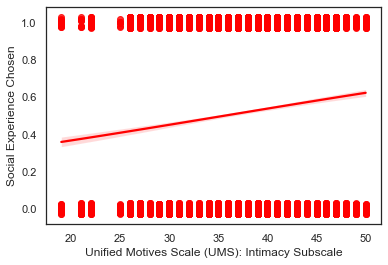

In [121]:
int_exp = sns.regplot(x="UM_INTIMACY", y="exp_chosen", data=data, logistic = True,y_jitter=0.03,color="red")
int_exp.set(xlabel='Unified Motives Scale (UMS): Intimacy Subscale', ylabel='Social Experience Chosen')


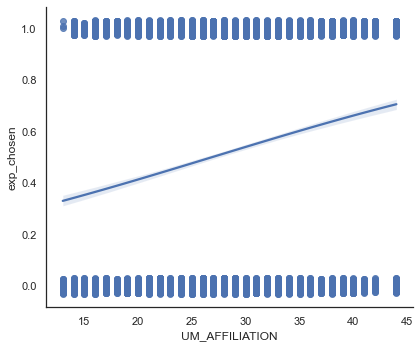

In [123]:
sns.lmplot(x="UM_AFFILIATION", y="exp_chosen", data=data,
           logistic=True, y_jitter=.03, height=5, aspect=1.2, palette = "red")
plt.show()

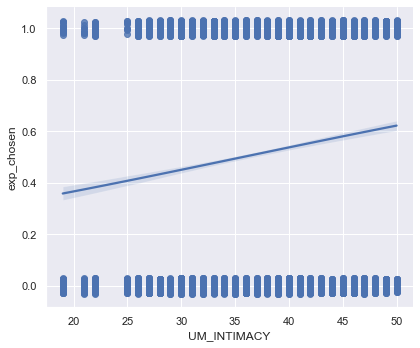

In [55]:
sns.lmplot(x="UM_INTIMACY", y="exp_chosen", data=data,
           logistic=True, y_jitter=.03, height=5, aspect=1.2)
plt.show()

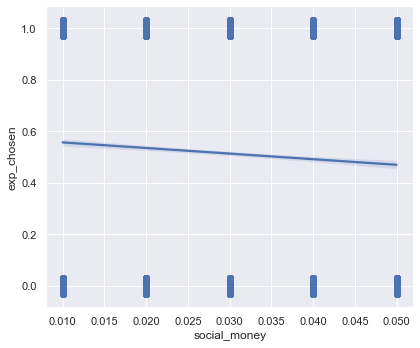

In [80]:
sns.lmplot(x="social_money", y="exp_chosen", data=data,
           logistic=True, y_jitter=.03, height=5, aspect=1.2)
plt.show()

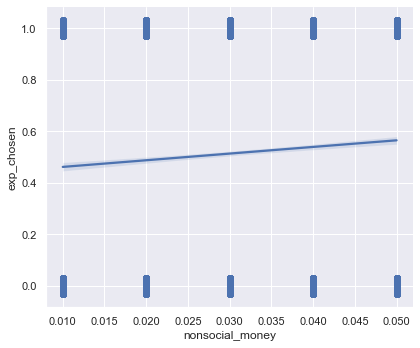

In [81]:
sns.lmplot(x="nonsocial_money", y="exp_chosen", data=data,
           logistic=True, y_jitter=.03, height=5, aspect=1.2)
plt.show()

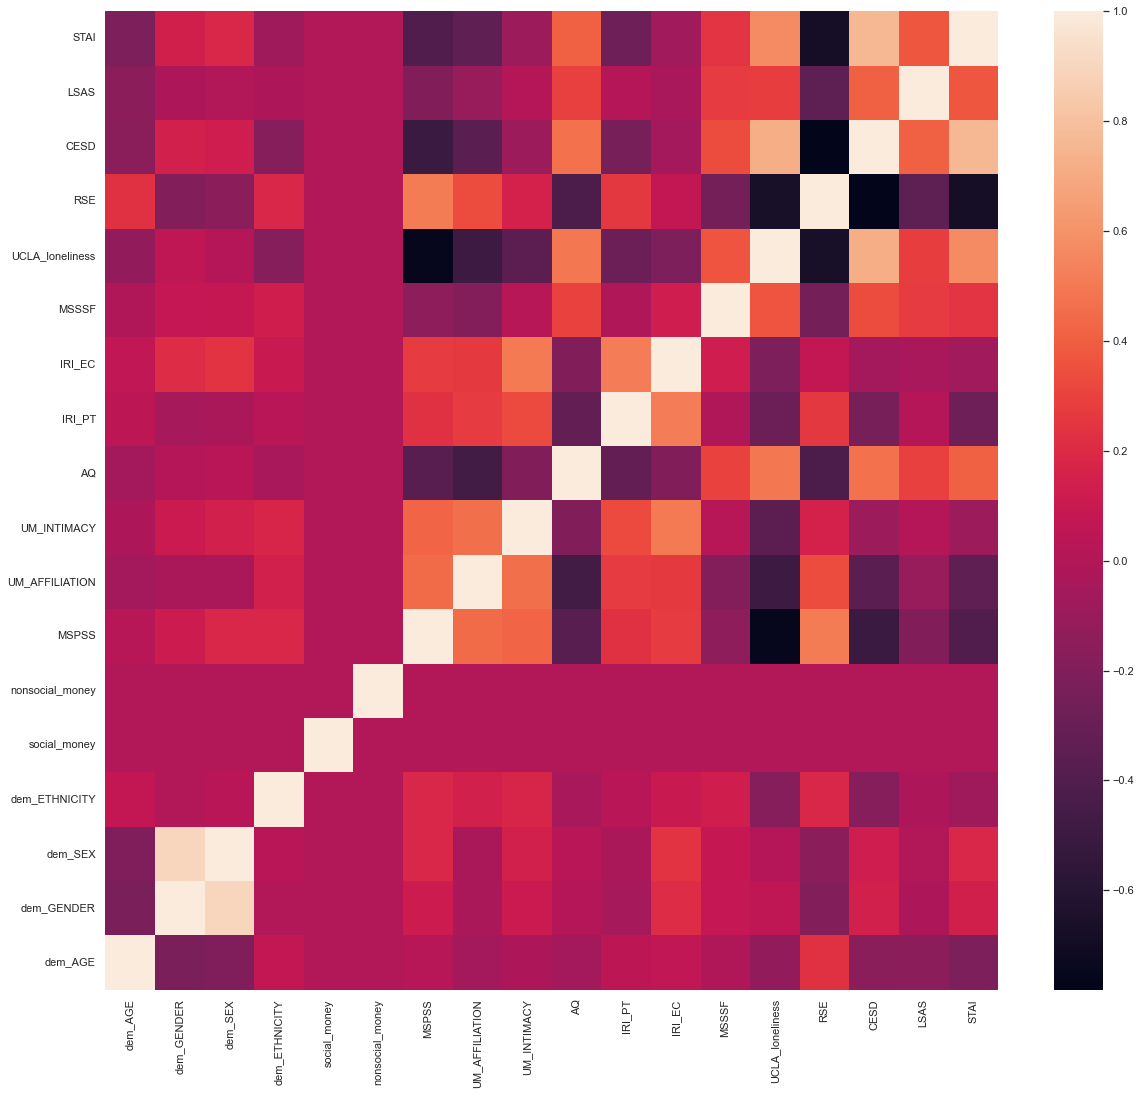

In [126]:
groups = ['dem_AGE','dem_GENDER','dem_SEX','dem_ETHNICITY', 'social_money', 'nonsocial_money','MSPSS','UM_AFFILIATION','UM_INTIMACY','AQ','IRI_PT','IRI_EC','MSSSF','UCLA_loneliness','RSE','CESD','LSAS','STAI']
data2 = data[groups]
data2.to_csv('WTP_Study2_LONG_REG_4heatmap.csv')
corr = data2.corr()
corr.style.background_gradient(cmap='coolwarm')
plt.figure(figsize=(20,18))
map= sns.heatmap(corr)
map.invert_yaxis()